In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import unicodedata
import os
import math
import warnings
warnings.filterwarnings("ignore")

In [2]:
all_tweets = pd.read_csv(r"/kaggle/input/stock-tweets-for-sentiment-analysis-and-prediction/stock_tweets.csv")
print(all_tweets["Stock Name"].unique())
print(all_tweets.shape)
all_tweets.head()

['TSLA' 'MSFT' 'PG' 'META' 'AMZN' 'GOOG' 'AMD' 'AAPL' 'NFLX' 'TSM' 'KO'
 'F' 'COST' 'DIS' 'VZ' 'CRM' 'INTC' 'BA' 'BX' 'NOC' 'PYPL' 'ENPH' 'NIO'
 'ZS' 'XPEV']
(80793, 4)


,Date,Tweet,Stock Name,Company Name
0,2022-09-29 23:41:16+00:00,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc."
1,2022-09-29 23:24:43+00:00,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc."
2,2022-09-29 23:18:08+00:00,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc."
3,2022-09-29 22:40:07+00:00,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc."
4,2022-09-29 22:27:05+00:00,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc."


In [3]:
stk_name = "AAPL"
appl_tweets = all_tweets[all_tweets["Stock Name"] == stk_name]
print(appl_tweets.shape)
appl_tweets.head()

(5056, 4)


,Date,Tweet,Stock Name,Company Name
55958,2022-09-29 22:23:54+00:00,$NIO just because I'm down money doesn't mean ...,AAPL,Apple Inc.
55959,2022-09-29 20:37:01+00:00,After trading for 9+ years \n\nThis is how to ...,AAPL,Apple Inc.
55960,2022-09-29 20:19:43+00:00,Not something you see very often. \n-2 ATR mo...,AAPL,Apple Inc.
55961,2022-09-29 20:13:48+00:00,$AAPL was down almost 5% today. Rare to see it...,AAPL,Apple Inc.
55962,2022-09-29 19:50:00+00:00,$AAPL APPLE JUST FIRED ITS HEAD OF PROCUREMENT...,AAPL,Apple Inc.


In [4]:
appl_sent = appl_tweets.copy()
appl_sent["sent_score"] = ''
appl_sent["pos_score"] = ''
appl_sent["neu_score"] = ''
appl_sent["neg_score"] = ''
appl_sent.head()

,Date,Tweet,Stock Name,Company Name,sent_score,pos_score,neu_score,neg_score
55958,2022-09-29 22:23:54+00:00,$NIO just because I'm down money doesn't mean ...,AAPL,Apple Inc.,,,,
55959,2022-09-29 20:37:01+00:00,After trading for 9+ years \n\nThis is how to ...,AAPL,Apple Inc.,,,,
55960,2022-09-29 20:19:43+00:00,Not something you see very often. \n-2 ATR mo...,AAPL,Apple Inc.,,,,
55961,2022-09-29 20:13:48+00:00,$AAPL was down almost 5% today. Rare to see it...,AAPL,Apple Inc.,,,,
55962,2022-09-29 19:50:00+00:00,$AAPL APPLE JUST FIRED ITS HEAD OF PROCUREMENT...,AAPL,Apple Inc.,,,,


In [5]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [6]:
%%time
sent_analyze = SentimentIntensityAnalyzer()
for ind,row in appl_sent.T.items():
    sentence_i = unicodedata.normalize("NFKD", appl_sent.loc[ind,"Tweet"])
    sent_sent = sent_analyze.polarity_scores(sentence_i)
    appl_sent.at[ind,"sent_score"] = sent_sent["compound"]
    appl_sent.at[ind,"pos_score"] = sent_sent["pos"]
    appl_sent.at[ind,"neu_score"] = sent_sent["neu"]
    appl_sent.at[ind,"neg_score"] = sent_sent["neg"]

CPU times: user 3.23 s, sys: 6.42 ms, total: 3.24 s
Wall time: 3.25 s


In [7]:
print(appl_sent.shape)
appl_sent.head()

(5056, 8)


,Date,Tweet,Stock Name,Company Name,sent_score,pos_score,neu_score,neg_score
55958,2022-09-29 22:23:54+00:00,$NIO just because I'm down money doesn't mean ...,AAPL,Apple Inc.,0.25,0.158,0.684,0.158
55959,2022-09-29 20:37:01+00:00,After trading for 9+ years \n\nThis is how to ...,AAPL,Apple Inc.,0.3612,0.085,0.915,0.0
55960,2022-09-29 20:19:43+00:00,Not something you see very often. \n-2 ATR mo...,AAPL,Apple Inc.,0.0,0.0,1.0,0.0
55961,2022-09-29 20:13:48+00:00,$AAPL was down almost 5% today. Rare to see it...,AAPL,Apple Inc.,-0.25,0.119,0.699,0.182
55962,2022-09-29 19:50:00+00:00,$AAPL APPLE JUST FIRED ITS HEAD OF PROCUREMENT...,AAPL,Apple Inc.,-0.6523,0.0,0.857,0.143


In [8]:
appl_sent["Date"] = pd.to_datetime(appl_sent['Date'])
appl_sent["Date"] = appl_sent["Date"].dt.date
sama_df = appl_sent[["Date","sent_score"]]
sama_df.head()

,Date,sent_score
55958,2022-09-29,0.25
55959,2022-09-29,0.3612
55960,2022-09-29,0.0
55961,2022-09-29,-0.25
55962,2022-09-29,-0.6523


In [9]:
sama_df = sama_df.groupby([sama_df["Date"]]).mean()
print(sama_df.shape)
sama_df.head()

(365, 1)


,sent_score
Date,
2021-09-30,0.0989
2021-10-01,0.291891
2021-10-02,0.007525
2021-10-03,0.8344
2021-10-04,0.04741


In [10]:
all_stock = pd.read_csv(r"/kaggle/input/stock-tweets-for-sentiment-analysis-and-prediction/stock_yfinance_data.csv")
print(all_stock.shape)
all_stock.head()

(6300, 8)


,Date,Open,High,Low,Close,Adj Close,Volume,Stock Name
0,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,TSLA
1,2021-10-01,259.466675,260.260010,254.529999,258.406677,258.406677,51094200,TSLA
2,2021-10-04,265.500000,268.989990,258.706665,260.510010,260.510010,91449900,TSLA
3,2021-10-05,261.600006,265.769989,258.066681,260.196655,260.196655,55297800,TSLA
4,2021-10-06,258.733337,262.220001,257.739990,260.916656,260.916656,43898400,TSLA


In [11]:
appl_stock = all_stock[all_stock["Stock Name"] == stk_name]
appl_stock["Date"] = pd.to_datetime(appl_stock["Date"])
appl_stock["Date"] = appl_stock["Date"].dt.date
appl_stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Stock Name
1764,2021-09-30,143.660004,144.380005,141.279999,141.500000,140.478485,89056700,AAPL
1765,2021-10-01,141.899994,142.919998,139.110001,142.649994,141.620163,94639600,AAPL
1766,2021-10-04,141.759995,142.210007,138.270004,139.139999,138.135513,98322000,AAPL
1767,2021-10-05,139.490005,142.240005,139.360001,141.110001,140.091278,80861100,AAPL
1768,2021-10-06,139.470001,142.149994,138.369995,142.000000,140.974869,83221100,AAPL


In [12]:
appl_stock.shape

(252, 8)

In [13]:
sama_df = appl_stock.join(sama_df, how="left", on="Date")
sama_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Stock Name,sent_score
1764,2021-09-30,143.660004,144.380005,141.279999,141.500000,140.478485,89056700,AAPL,0.0989
1765,2021-10-01,141.899994,142.919998,139.110001,142.649994,141.620163,94639600,AAPL,0.291891
1766,2021-10-04,141.759995,142.210007,138.270004,139.139999,138.135513,98322000,AAPL,0.04741
1767,2021-10-05,139.490005,142.240005,139.360001,141.110001,140.091278,80861100,AAPL,0.13906
1768,2021-10-06,139.470001,142.149994,138.369995,142.000000,140.974869,83221100,AAPL,0.2192


In [14]:
sama_df.shape

(252, 9)

In [15]:
from matplotlib.dates import DateFormatter

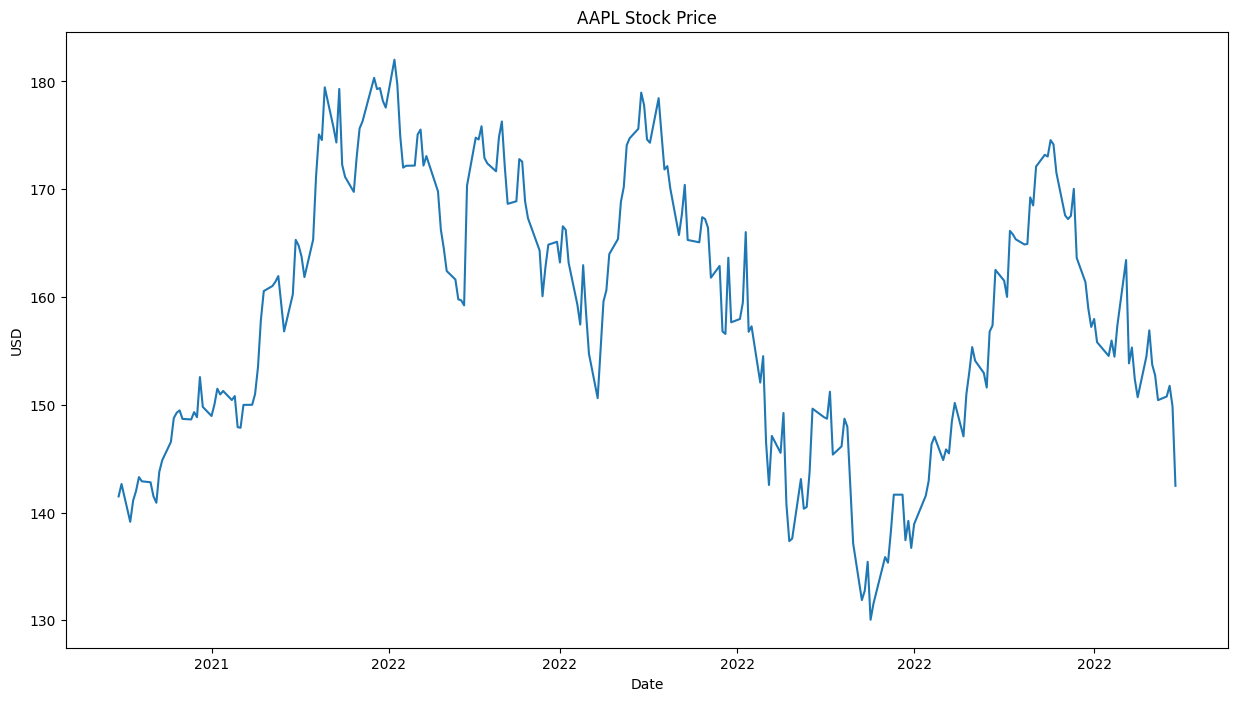

In [16]:
fig,ax = plt.subplots(figsize=(15,8))
ax.plot(sama_df["Date"], sama_df["Close"])
ax.set(xlabel="Date",ylabel="USD",title=f"{stk_name} Stock Price")
ax.xaxis.set_major_formatter(DateFormatter("%Y"))
plt.show()

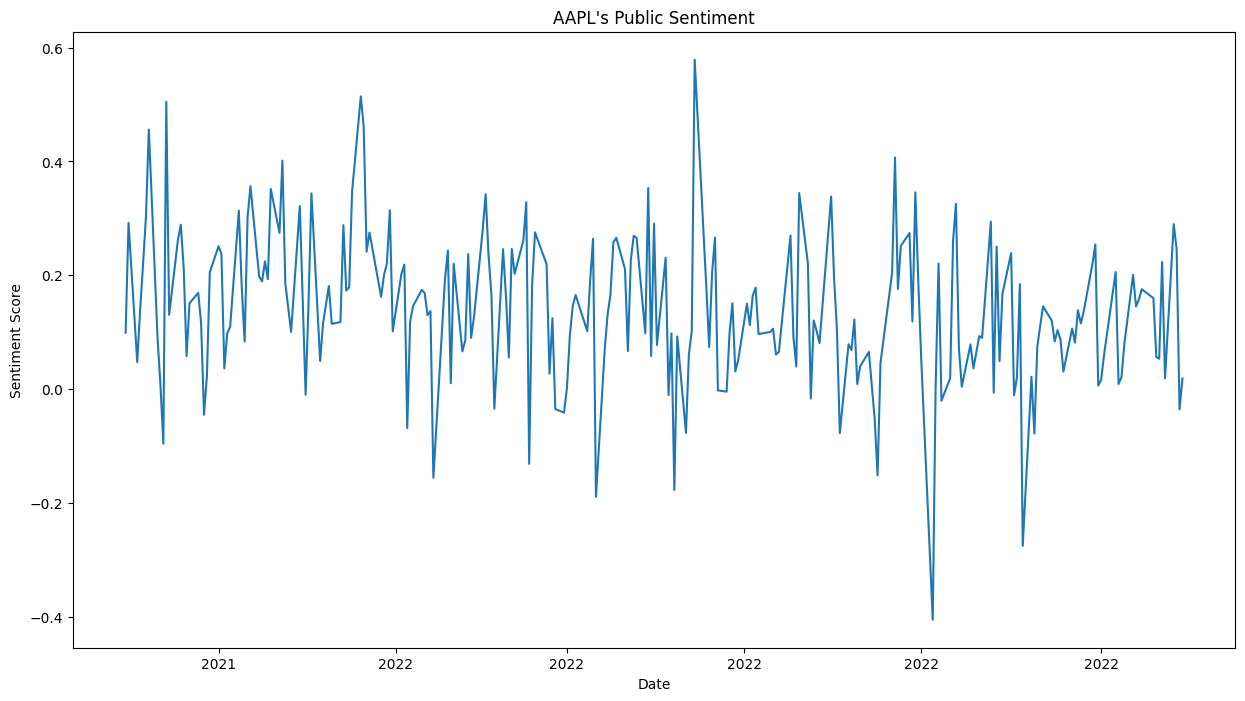

In [17]:
fig,ax = plt.subplots(figsize=(15,8))
ax.plot(sama_df["Date"], sama_df["sent_score"])
ax.set(xlabel="Date",ylabel="Sentiment Score",title=f"{stk_name}'s Public Sentiment")
ax.xaxis.set_major_formatter(DateFormatter("%Y"))
plt.show()

In [18]:
fin_df = sama_df[["Date","Close","sent_score"]]
fin_df = fin_df.reset_index(drop=True)
print(fin_df.shape)
fin_df.head()

(252, 3)


,Date,Close,sent_score
0,2021-09-30,141.500000,0.0989
1,2021-10-01,142.649994,0.291891
2,2021-10-04,139.139999,0.04741
3,2021-10-05,141.110001,0.13906
4,2021-10-06,142.000000,0.2192


# **Building the SA-MA Model**

In [19]:
import statistics

In [20]:
def SAMA(df, ma_days=5):
    def weight_multiplier(close,sent_score):
        maxi = max(close)
        mini = min(close)
        len_close = len(close)
        if len_close<2:
            interval = math.sqrt(close[0])
        else:
            interval = statistics.variance(close)
        max_var = interval
        weighted=0
        for i in range(len_close):
            if sent_score[i] < 0:
                weighted += close[i] + (2*sent_score[i]*max_var)
            else:
                weighted += close[i] + (sent_score[i]*max_var)
        return weighted/len_close-1
    samas = [df.loc[0,"Close"]]
    rows = df.shape[0]
    for i in range(1,rows):
        if i < ma_days:
            mini_df = df.iloc[:i+1,:]
        elif i + ma_days >= rows:
            mini_df = df.iloc[i:,:]
        else:
            mini_df = df.iloc[i-ma_days+1:i+1,:]
        sama_value = weight_multiplier(mini_df["Close"].tolist(),mini_df["sent_score"].tolist())
        samas.append(sama_value)
    return samas

In [21]:
sama_7 = SAMA(fin_df, ma_days=7)
sama_20 = SAMA(fin_df, ma_days=20)
fin_df["SAMA(7)"] = sama_7
fin_df["SAMA(20)"] = sama_20
fin_df.head()

,Date,Close,sent_score,SAMA(7),SAMA(20)
0,2021-09-30,141.500000,0.0989,141.500000,141.500000
1,2021-10-01,142.649994,0.291891,141.204201,141.204201
2,2021-10-04,139.139999,0.04741,140.564375,140.564375
3,2021-10-05,141.110001,0.13906,140.408072,140.408072
4,2021-10-06,142.000000,0.2192,140.560838,140.560838


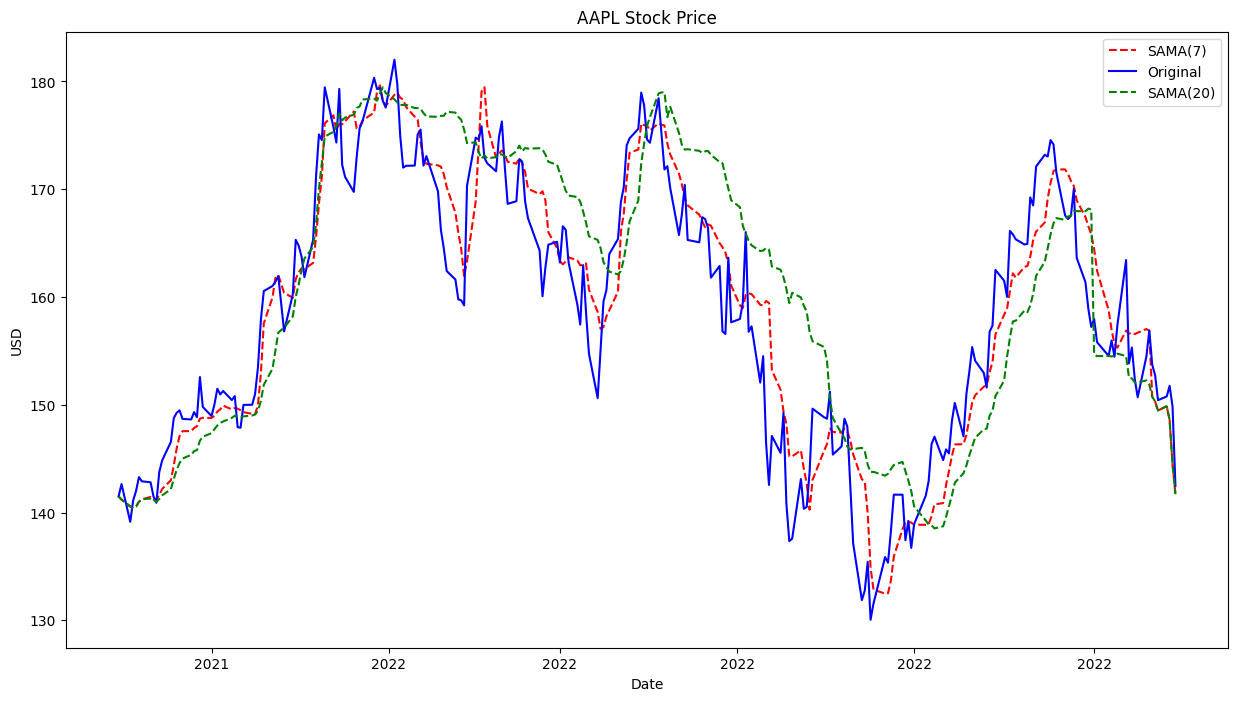

In [22]:
fig,ax = plt.subplots(figsize=(15,8))
ax.plot(fin_df["Date"], fin_df["SAMA(7)"], label="SAMA(7)", linestyle="--", color="r")
ax.plot(fin_df["Date"], fin_df["Close"], label="Original", color="b")
ax.plot(fin_df["Date"], fin_df["SAMA(20)"], label="SAMA(20)", linestyle="--", color="g")
ax.set(xlabel="Date",ylabel="USD",title=f"{stk_name} Stock Price")
ax.xaxis.set_major_formatter(DateFormatter("%Y"))
plt.legend()
plt.show()

In [23]:
fin_df["MA7"] = fin_df.iloc[:,1].rolling(window=7).mean()
fin_df["MA20"] = fin_df.iloc[:,1].rolling(window=20).mean()
fin_df.head()

,Date,Close,sent_score,SAMA(7),SAMA(20),MA7,MA20
0,2021-09-30,141.500000,0.0989,141.500000,141.500000,NaN,NaN
1,2021-10-01,142.649994,0.291891,141.204201,141.204201,NaN,NaN
2,2021-10-04,139.139999,0.04741,140.564375,140.564375,NaN,NaN
3,2021-10-05,141.110001,0.13906,140.408072,140.408072,NaN,NaN
4,2021-10-06,142.000000,0.2192,140.560838,140.560838,NaN,NaN


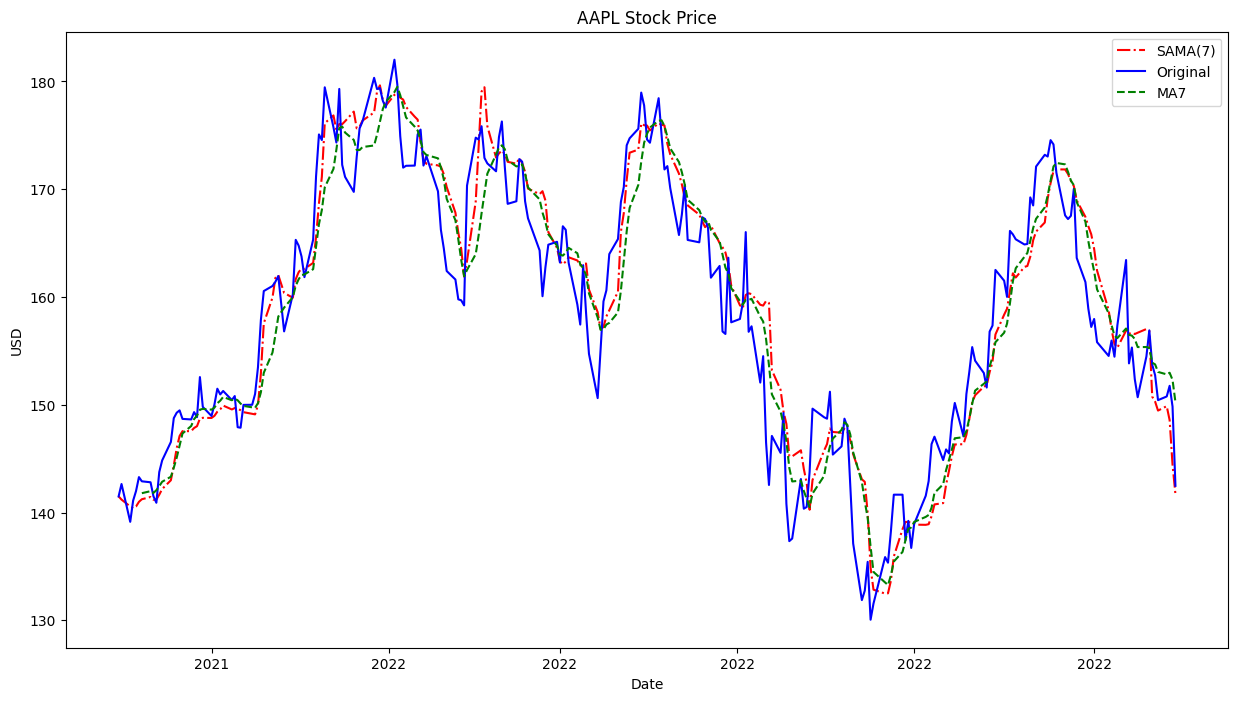

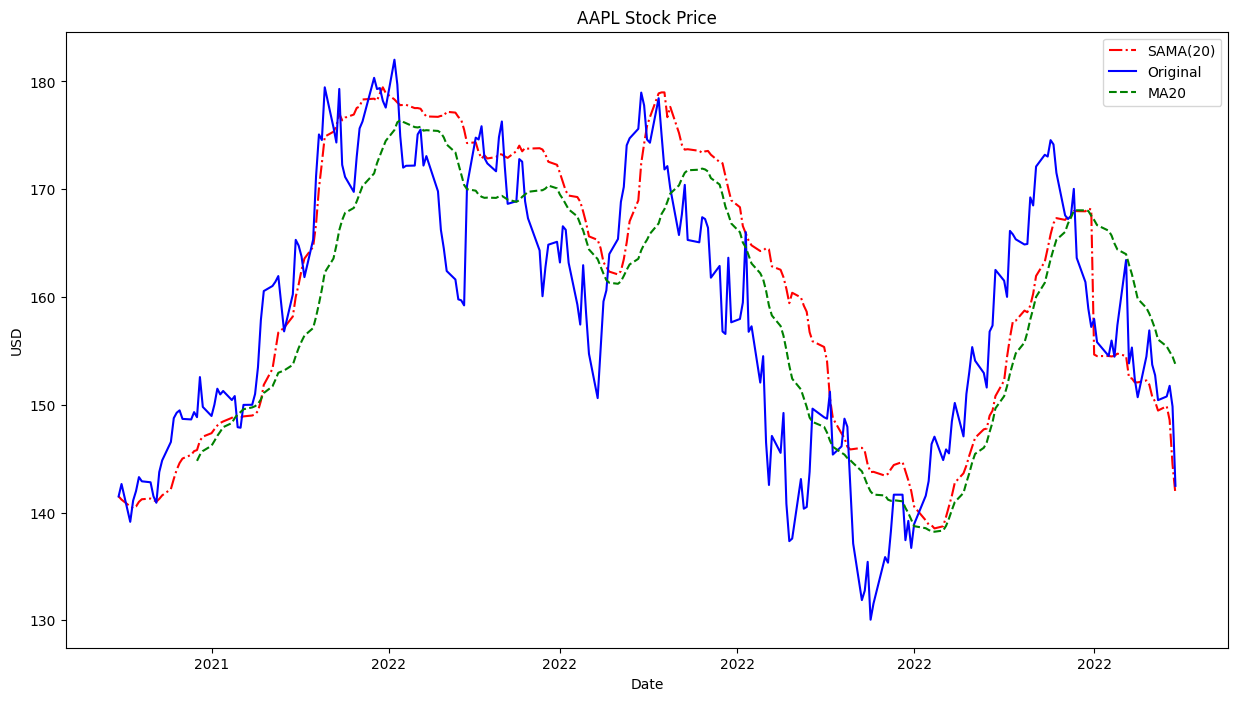

In [24]:
for i in ("7","20"):
    fig,ax = plt.subplots(figsize=(15,8))
    ax.plot(fin_df["Date"], fin_df["SAMA("+i+")"], label="SAMA("+i+")", linestyle="-.", color="r")
    ax.plot(fin_df["Date"], fin_df["Close"], label="Original", color="b")
    ax.plot(fin_df["Date"], fin_df["MA"+i], label="MA"+i, linestyle="--", color="g")
    ax.set(xlabel="Date",ylabel="USD",title=f"{stk_name} Stock Price")
    ax.xaxis.set_major_formatter(DateFormatter("%Y"))
    plt.legend()
    plt.show()

In [25]:
from scipy.stats import f

var_sama7 = np.var(fin_df["SAMA(7)"],ddof=1)
var_ma7 = np.var(fin_df["MA7"],ddof=1)

f_value_7 = var_sama7/var_ma7

df = 251
p_value = f.cdf(f_value_7,df,df)

print(f_value_7,p_value)

1.128682010440521 0.8308814955501487
